In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [84]:
df=pd.read_csv('https://raw.githubusercontent.com/Prabhu-Tejas/CSV-files/main/WA_Fn_UseC_Telco-Customer-Churn.csv')

In [85]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Priliminary data understanding

In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [7]:
df.duplicated().sum() 	          # No duplicates values in dataset

0

In [8]:
df.isna().sum()  

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

# Priliminary observations:

No duplicates, No null values observed
3 numerical and 18 non numerical(Categorical) columns observed, which needs to relooked.

In [10]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O'] 
print('The total number of Categorical Features are {}'.format(len(categorical_features)))

The total number of Categorical Features are 18


In [11]:
df1=df.drop(["customerID"],axis=1)
df1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [12]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [13]:
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

In [14]:
df.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
numeric_lst=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_cols = list(df.select_dtypes(include=numeric_lst).columns)
df_numerical=df[numerical_cols]

In [16]:
numerical_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [17]:
df_numerical.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


In [18]:
df_numerical.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [19]:
print(df_numerical[df_numerical['tenure']==df_numerical.tenure.max()])

      tenure  MonthlyCharges  TotalCharges
28        72           90.25       6369.45
35        72           99.90       7251.70
59        72          107.50       7853.70
62        72           42.10       2962.00
94        72          100.90       7459.05
...      ...             ...           ...
6982      72           74.35       5237.40
7007      72           63.10       4685.55
7022      72          104.95       7544.30
7037      72           21.15       1419.40
7039      72          103.20       7362.90

[362 rows x 3 columns]


In [20]:
print(df_numerical[df_numerical['tenure']==df_numerical.tenure.min()])

      tenure  MonthlyCharges  TotalCharges
488        0           52.55           NaN
753        0           20.25           NaN
936        0           80.85           NaN
1082       0           25.75           NaN
1340       0           56.05           NaN
3331       0           19.85           NaN
3826       0           25.35           NaN
4380       0           20.00           NaN
5218       0           19.70           NaN
6670       0           73.35           NaN
6754       0           61.90           NaN


In [21]:
print(df_numerical[df_numerical['MonthlyCharges']==df_numerical.MonthlyCharges.max()])

      tenure  MonthlyCharges  TotalCharges
4586      72          118.75       8672.45


In [22]:
print(df[df['MonthlyCharges']==df.MonthlyCharges.max()])

      customerID  gender SeniorCitizen Partner Dependents  tenure  \
4586  7569-NMZYQ  Female             0     Yes        Yes      72   

     PhoneService MultipleLines InternetService OnlineSecurity  ...  \
4586          Yes           Yes     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
4586              Yes         Yes         Yes             Yes  Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
4586              Yes  Bank transfer (automatic)         118.75       8672.45   

      Churn  
4586     No  

[1 rows x 21 columns]


In [23]:
print(df_numerical[df_numerical['TotalCharges']==df_numerical.TotalCharges.max()])

      tenure  MonthlyCharges  TotalCharges
4610      72           117.8        8684.8


In [24]:
print(df[df['TotalCharges']==df.TotalCharges.max()])

      customerID gender SeniorCitizen Partner Dependents  tenure PhoneService  \
4610  2889-FPWRM   Male             0     Yes         No      72          Yes   

     MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
4610           Yes     Fiber optic            Yes  ...              Yes   

     TechSupport StreamingTV StreamingMovies  Contract PaperlessBilling  \
4610         Yes         Yes             Yes  One year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
4610  Bank transfer (automatic)          117.8        8684.8    Yes  

[1 rows x 21 columns]


In [25]:
df_numerical.quantile([0, 0.25, 0.5, 0.75, 1])


,tenure,MonthlyCharges,TotalCharges
0.00,0.0,18.25,18.8000
0.25,9.0,35.50,401.4500
0.50,29.0,70.35,1397.4750
0.75,55.0,89.85,3794.7375
1.00,72.0,118.75,8684.8000


In [26]:
df_numerical.max()

tenure              72.00
MonthlyCharges     118.75
TotalCharges      8684.80
dtype: float64

In [27]:
sort=df_numerical.sort_values(['MonthlyCharges', 'tenure', 'TotalCharges'], ascending=False)
sort

,tenure,MonthlyCharges,TotalCharges
4586,72,118.75,8672.45
2115,71,118.65,8477.60
3894,68,118.60,7990.05
4804,61,118.60,7365.70
5127,67,118.35,7804.15
...,...,...,...
1156,53,18.70,1005.70
6906,25,18.70,383.65
6652,36,18.55,689.00
1529,59,18.40,1057.85


array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>],
       [<AxesSubplot:title={'center':'TotalCharges'}>, <AxesSubplot:>]],
      dtype=object)

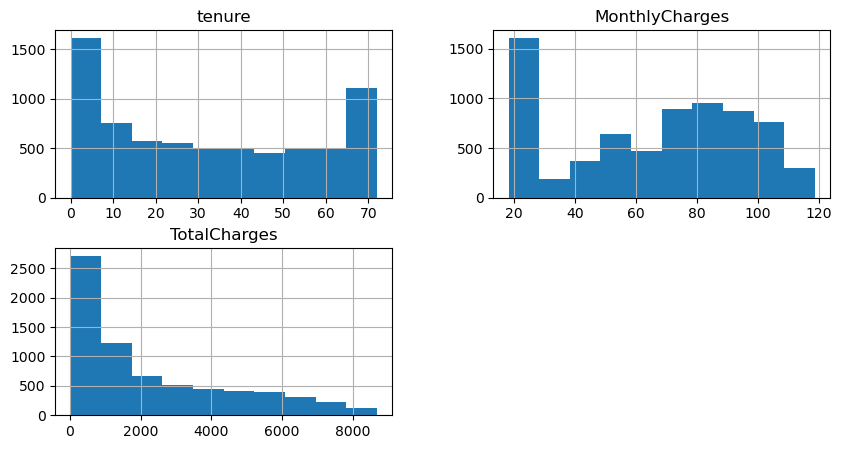

In [28]:
df_numerical.hist(figsize=(10,5))


In [29]:
df_numerical.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

Skewness is a measurement of the distortion of symmetrical distribution in a data set. Skewness is demonstrated on a bell curve when data points are not distributed symmetrically to the left and right sides of the median on a bell curve. If the bell curve is shifted to the left or the right, it is said to be skewed.

tenure and MonthlyCharges are fairly symetric, wheras tenure is highly skewed towards positive.

In [30]:
df_numerical.kurtosis()

tenure           -1.387372
MonthlyCharges   -1.257260
TotalCharges     -0.231799
dtype: float64

In [31]:
df_numerical.corr()


,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


<AxesSubplot:>

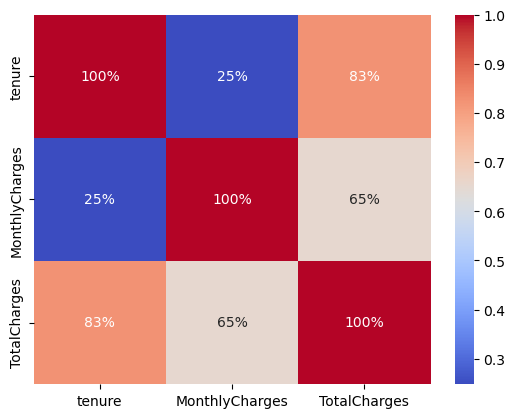

In [32]:
sns.heatmap(data=df_numerical.corr(),annot= True, cmap= "coolwarm", fmt=".0%")
            

In [33]:
df['Churn'].value_counts() 

No     5174
Yes    1869
Name: Churn, dtype: int64

<AxesSubplot:>

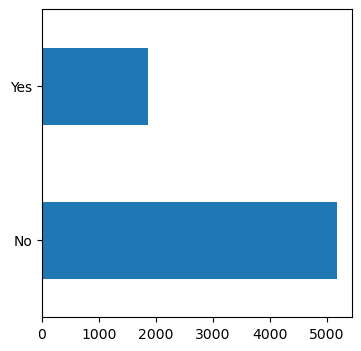

In [34]:
df['Churn'].value_counts().plot(kind='barh', figsize=(4,4))


In [35]:
columns=list(df_numerical.columns)

In [36]:
list([df_numerical.columns])

[Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')]

In [37]:
Gender_count=df['gender'].value_counts()

In [38]:
Gender_percent=df['gender'].value_counts(normalize=True).mul(100).astype(str)+" %"

In [39]:
Gender=pd.concat([Gender_count,Gender_percent], axis=1, keys=['count', 'percentage'])
Gender=pd.DataFrame(Gender)
Gender

,count,percentage
Male,3555,50.4756495811444 %
Female,3488,49.5243504188556 %


In [40]:
df[['gender','Churn']].value_counts()

gender  Churn
Male    No       2625
Female  No       2549
        Yes       939
Male    Yes       930
dtype: int64

In [41]:
df[['gender','Churn']].groupby('gender').value_counts()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
dtype: int64

In [42]:
Gender_churn=df[['gender','Churn']].groupby('gender').value_counts(normalize=True).mul(100).astype(str)+" %"
Gender_churn=Gender_churn.unstack()
Gender_churn

Churn,No,Yes
gender,,
Female,73.07912844036697 %,26.920871559633024 %
Male,73.83966244725738 %,26.160337552742618 %


In [43]:
Senior_count=df['SeniorCitizen'].value_counts()

In [44]:
Senior_percent=df['SeniorCitizen'].value_counts(normalize=True).mul(100).astype(str)+" %"

In [93]:
Senior=pd.concat([Senior_count,Senior_percent], axis=1, keys=['count', 'percentage'])
Senior=pd.DataFrame(Senior)
Senior

,count,percentage
0,5901,83.78531875621185 %
1,1142,16.21468124378816 %


In [94]:
df[['SeniorCitizen','Churn']].groupby('SeniorCitizen').value_counts()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
dtype: int64

In [95]:
df[['SeniorCitizen','Churn']].groupby('SeniorCitizen').value_counts(normalize=True).mul(100).astype(str)+" %"

SeniorCitizen  Churn
0              No         76.3938315539739 %
               Yes      23.606168446026096 %
1              No        58.31873905429072 %
               Yes       41.68126094570928 %
dtype: object

In [96]:
dependents_count=df['Dependents'].value_counts()

In [97]:
dependents_percent=df['Dependents'].value_counts(normalize=True).mul(100).astype(str)+" %"

In [98]:
Dependent=pd.concat([dependents_count,dependents_percent], axis=1, keys=['count', 'percentage'])
Dependent=pd.DataFrame(Senior)
Dependent

,count,percentage
0,5901,83.78531875621185 %
1,1142,16.21468124378816 %


In [99]:
df[['Dependents','Churn']].groupby('Dependents').value_counts(normalize=True).mul(100).astype(str)+" %"

Dependents  Churn
No          No        68.72085951753498 %
            Yes      31.279140482465028 %
Yes         No        84.54976303317535 %
            Yes      15.450236966824646 %
dtype: object

In [100]:
Partner_count=df['Partner'].value_counts()

In [101]:
Partner_percent=df['Partner'].value_counts(normalize=True).mul(100).astype(str)+" %"

In [102]:
Partner=pd.concat([Partner_count,Partner_percent], axis=1, keys=['count', 'percentage'])
Partner=pd.DataFrame(Partner)
Partner

,count,percentage
No,3641,51.696720147664344 %
Yes,3402,48.30327985233565 %


In [103]:
df[['Partner','Churn']].groupby('Partner').value_counts(normalize=True).mul(100).astype(str)+" %"

Partner  Churn
No       No       67.04202142268608 %
         Yes      32.95797857731392 %
Yes      No       80.33509700176367 %
         Yes      19.66490299823633 %
dtype: object

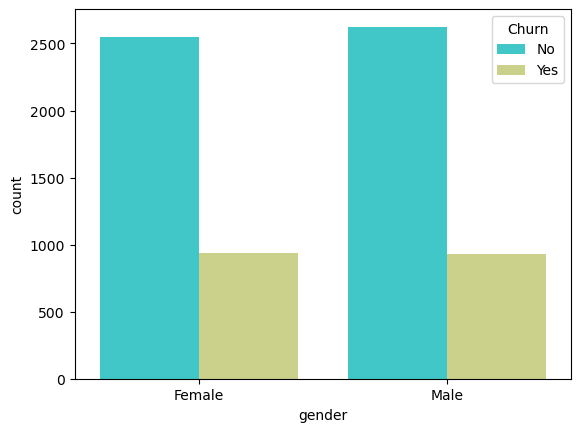

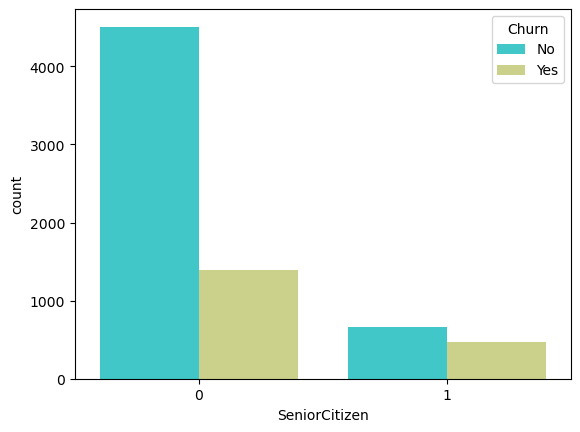

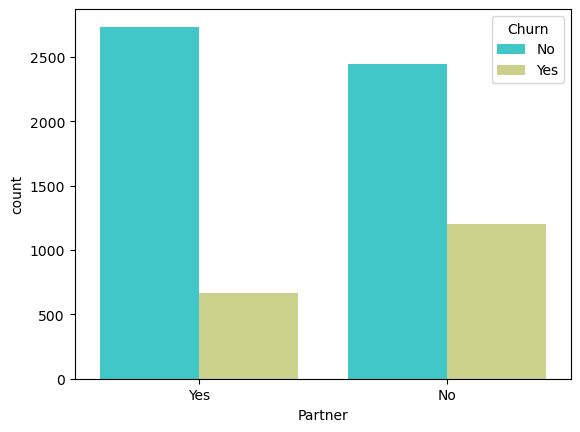

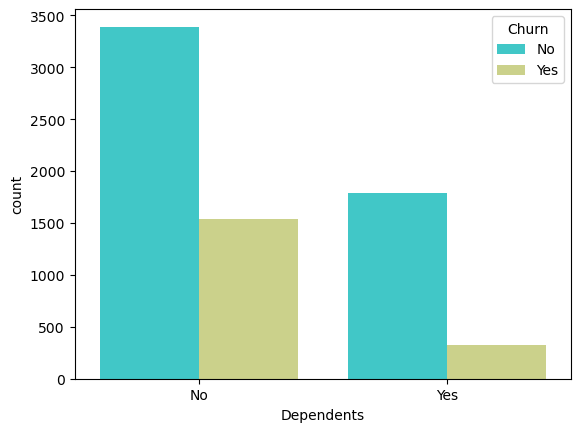

In [104]:
C1=df[['gender','SeniorCitizen','Partner','Dependents']]

for i in C1:
    plt.figure(i)
    sns.countplot(data=df,x=i,hue='Churn',palette='rainbow')
    
plt.show()

In [105]:
churn_map = {'No': 0, 'Yes': 1} # mapping target variable coverting categorical to Numeric
df['Churn'] = df['Churn'].map(churn_map)
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [106]:
df['gender']

0       Female
1         Male
2         Male
3         Male
4       Female
         ...  
7038      Male
7039    Female
7040    Female
7041      Male
7042      Male
Name: gender, Length: 7043, dtype: object

In [107]:
gender_map = {'Female': 0, 'Male': 1}
df['gender'] = df['gender'].map(gender_map)
df['gender']


0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    0
7041    1
7042    1
Name: gender, Length: 7043, dtype: int64

In [108]:
gender=df[df['Churn']==1]['gender'].value_counts()
gender

0    939
1    930
Name: gender, dtype: int64

In [109]:
gender=[gender[0]/sum(gender)*100,gender[1]/sum(gender)*100]
gender

[50.24077046548957, 49.75922953451043]

In [110]:
df['SeniorCitizen']

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64

In [111]:
df['Dependents']

0        No
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041     No
7042     No
Name: Dependents, Length: 7043, dtype: object

In [112]:
Dependents_map = {'No': 0, 'Yes': 1} # mapping 
df['Dependents'] = df['Dependents'].map(Dependents_map)
df['Dependents']

0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7043, dtype: int64

In [113]:
df["Partner"]

0       Yes
1        No
2        No
3        No
4        No
       ... 
7038    Yes
7039    Yes
7040    Yes
7041    Yes
7042     No
Name: Partner, Length: 7043, dtype: object

In [114]:
Partner_map = {'No': 0, 'Yes': 1} # mapping target variable coverting categorical to Numeric
df['Partner'] = df['Partner'].map(Partner_map)
df['Partner']

0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7043, dtype: int64

In [115]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [147]:
Senior_citizen=df[df['SeniorCitizen']==1]['Churn'].value_counts()
Senior_citizen=[Seniorcitizen[0]/sum(Seniorcitizen)*100,Seniorcitizen[1]/sum(Seniorcitizen)*100]
Senior_citizen

[58.31873905429072, 41.68126094570928]

In [120]:
Dependents=df[df['Dependents']==1]['Churn'].value_counts()
Dependents=[Dependents[0]/sum(Dependents)*100,Dependents[1]/sum(Dependents)*100]
Dependents

[84.54976303317535, 15.450236966824646]

In [121]:
Partner=df[df['Partner']==1]['Churn'].value_counts()
Partner=[Partner[0]/sum(Partner)*100,Partner[1]/sum(Partner)*100]
Partner

[80.33509700176367, 19.66490299823633]

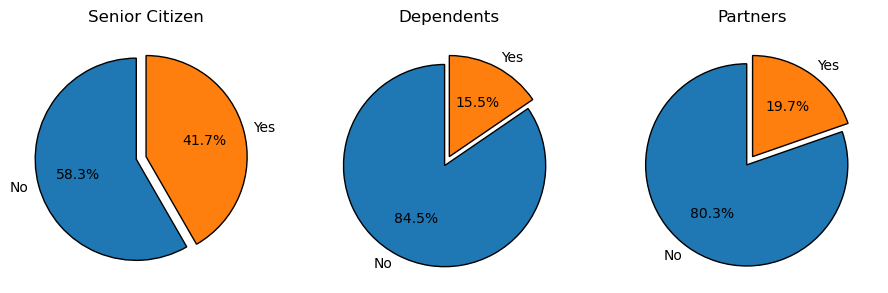

In [134]:
ax,fig = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15))


plt.subplot(1,4,2)
plt.pie(Seniorcitizen,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Senior Citizen');
plt.subplot(1,4,3)
plt.pie(Dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');
plt.subplot(1,4,4)
plt.pie(Partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partners');

In [154]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [155]:
df[df["Churn"]==1]["gender"].value_counts()

0    939
1    930
Name: gender, dtype: int64

In [156]:

Churn_gender=gender[0],gender[1]
Churn_gender

(50.24077046548957, 49.75922953451043)

In [157]:
df[df["Churn"]==1]["SeniorCitizen"].value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

In [160]:
Churn_Senior=df[df['SeniorCitizen']==1]['Churn'].value_counts()
Churn_Senior=[Seniorcitizen[0]/sum(Seniorcitizen)*100,Seniorcitizen[1]/sum(Seniorcitizen)*100]
Churn_Senior

[58.31873905429072, 41.68126094570928]

In [150]:
df[df["Churn"]==1]["gender"].value_counts()

0    939
1    930
Name: gender, dtype: int64

In [ ]:
df[df["Churn"]==1]["gender"].value_counts()

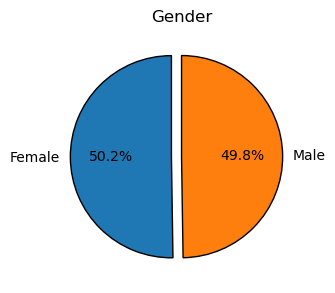

In [136]:
ax,fig = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');



1. We can see from the above information that as per the 'Gender' both male and female are having almost equal probability of churning. Female: 50.24 and male:49.75. Hence this doesnt show much of information.
2. The customer who are not Senior Citizens are churning more than the senior Citizens. Non_senior Citizens:74.53 and Senior Citizens: 25.46
3. The people who have dependents have more chances of staying back than the ones who don't. No Dependents: 82.55 and
   Dependents:17.44
4. The people who have partners are more likely to churn than the ones who dont have. Partner: 64.20 and No-Partner:35.79


## Impact of the services each customer has signed up wrt Churn

There are various Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies. This visualzation can be used to analyse as to what is the impact of the services being provided and what it's impact in retaining the customers..

In [172]:
# No internet service and No phone service can be grouped as No, so replacing these with 'No'
df.replace('No internet service','No',inplace = True)
df.replace('No phone service','No',inplace=True)

In [173]:
PhoneService=df[df['Churn']==1]['PhoneService'].value_counts()
PhoneService=[PhoneService[0]/sum(PhoneService)*100,PhoneService[1]/sum(PhoneService)*100]

MultipleLines=df[df['Churn']==1]['MultipleLines'].value_counts()
MultipleLines=[MultipleLines[0]/sum(MultipleLines)*100,MultipleLines[1]/sum(MultipleLines)*100]

InternetService=df[df['Churn']==1]['InternetService'].value_counts()
InternetService=[InternetService[0]/sum(InternetService)*100,InternetService[1]/sum(InternetService)*100]

OnlineSecurity=df[df['Churn']==1]['OnlineSecurity'].value_counts()
OnlineSecurity=[OnlineSecurity[0]/sum(OnlineSecurity)*100,OnlineSecurity[1]/sum(OnlineSecurity)*100]

OnlineBackup=df[df['Churn']==1]['OnlineBackup'].value_counts()
OnlineBackup=[OnlineBackup[0]/sum(OnlineBackup)*100,OnlineBackup[1]/sum(OnlineBackup)*100]

DeviceProtection=df[df['Churn']==1]['DeviceProtection'].value_counts()
DeviceProtection=[DeviceProtection[0]/sum(DeviceProtection)*100,DeviceProtection[1]/sum(DeviceProtection)*100]

TechSupport=df[df['Churn']==1]['TechSupport'].value_counts()
TechSupport=[TechSupport[0]/sum(TechSupport)*100,TechSupport[1]/sum(TechSupport)*100]

StreamingTV=df[df['Churn']==1]['StreamingTV'].value_counts()
StreamingTV=[StreamingTV[0]/sum(StreamingTV)*100,StreamingTV[1]/sum(StreamingTV)*100]

StreamingMovies=df[df['Churn']==1]['StreamingMovies'].value_counts()
StreamingMovies=[StreamingMovies[0]/sum(StreamingMovies)*100,StreamingMovies[1]/sum(StreamingMovies)*100]

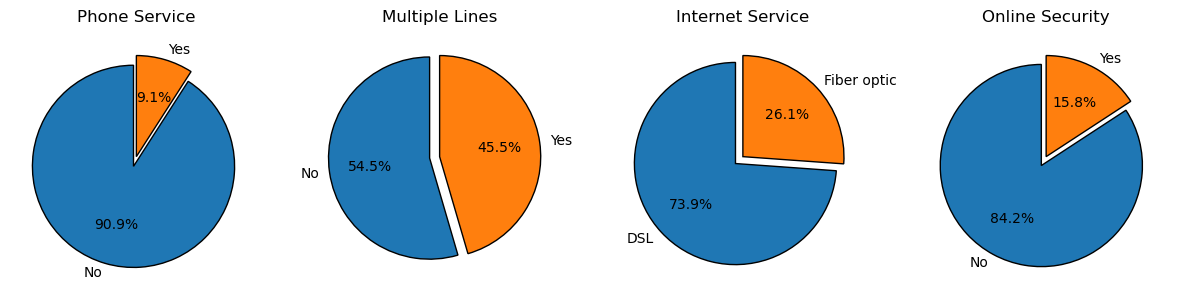

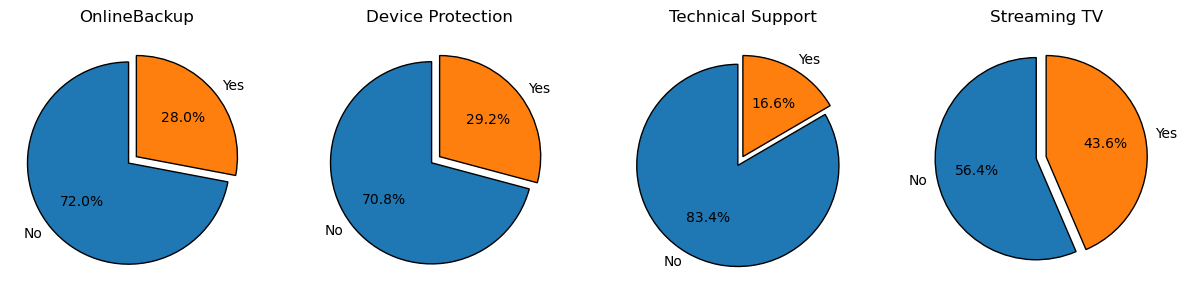

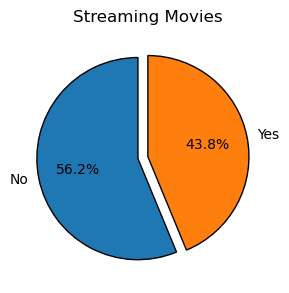

In [174]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(PhoneService,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Phone Service');


plt.subplot(1,4,2)
plt.pie(MultipleLines,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Multiple Lines');

plt.subplot(1,4,3)
plt.pie(InternetService,labels = ['DSL','Fiber optic'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Internet Service');


plt.subplot(1,4,4)
plt.pie(OnlineSecurity,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Online Security');

ax,fig = plt.subplots(nrows = 1,ncols = 5,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(OnlineBackup,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');


plt.subplot(1,4,2)
plt.pie(DeviceProtection	,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Device Protection');

plt.subplot(1,4,3)
plt.pie(TechSupport,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Technical Support');


plt.subplot(1,4,4)
plt.pie(StreamingTV,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Streaming TV');

ax,fig = plt.subplots(nrows = 1,ncols = 1,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(StreamingMovies,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Streaming Movies');

Insights from the above Chart

We can see from the pie chart clearly that only 9 % of people who have taken phone services have churned.People will stay back mostly if they are taking phone service.

From Internet Services offered we can see that the customers who have DSL(Digital Subscriber line) are more likely to chrun. So the company should work on moving those customers to Fiber Optic.

We can see from the pie chart that most of the customers(nearly 50 %) who have signed up for Streaming movies, Streaming T.V, Multiple lines have stopped using the services(churned). This could be because of higher cost, bad service. We should analyse the situation(RCA).

Similarly we also need to check online backup, Device protection, Internet service fields as well.




In [ ]:
df

In [180]:
churn_1=df.drop(['customerID'], axis=1)
churn_1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,1,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,1,0,0,0,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,0,0,1,1,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,0,0,1,1,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [181]:
churn_1_dumm = pd.get_dummies(churn_1,columns=['Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling',
       'PaymentMethod'])
churn_1_dumm

,gender,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_0,Partner_1,Dependents_0,Dependents_1,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,29.85,29.85,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,1,0,34,56.95,1889.5,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,1,0,2,53.85,108.15,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,1,0,45,42.30,1840.75,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,0,2,70.70,151.65,1,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,24,84.80,1990.5,0,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,0,72,103.20,7362.9,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,0,11,29.60,346.45,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,1,4,74.40,306.6,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [182]:
churn_1_dumm.info() # After encoding all categorical variables are converted into Numeric data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   tenure                                   7043 non-null   int64  
 3   MonthlyCharges                           7043 non-null   float64
 4   TotalCharges                             7043 non-null   object 
 5   Churn                                    7043 non-null   int64  
 6   Partner_0                                7043 non-null   uint8  
 7   Partner_1                                7043 non-null   uint8  
 8   Dependents_0                             7043 non-null   uint8  
 9   Dependents_1                             7043 non-null   uint8  
 10  PhoneService_No                          7043 no

In [183]:
churn_1_dumm.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
OnlineSecurity_No                          0.171226
TechSupport_No                             0.164674
Dependents_0                               0.164221
SeniorCitizen                              0.150889
Partner_0                                  0.150448
OnlineBackup_No                            0.082255
DeviceProtection_No                        0.066160
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender                                    -0.008612
PhoneService_No                           -0.011942
MultipleLine

In [184]:

values = churn_1_dumm.corr()['Churn'].sort_values(ascending=False)[1:].values

values


array([ 0.40510291,  0.30801974,  0.30191875,  0.19335642,  0.19182533,
        0.17122629,  0.16467356,  0.1642214 ,  0.15088933,  0.15044754,
        0.08225487,  0.06615979,  0.06322775,  0.06138155,  0.04010213,
        0.01194198, -0.0086121 , -0.01194198, -0.04010213, -0.06138155,
       -0.06322775, -0.06615979, -0.08225487, -0.09168284, -0.11793667,
       -0.12421382, -0.13430175, -0.15044754, -0.1642214 , -0.16467356,
       -0.17122629, -0.17782002, -0.19182533, -0.22789045, -0.30225347,
       -0.35222867])

In [185]:
index = churn_1_dumm.corr()['Churn'].sort_values(ascending=False)[1:].index
index

Index(['Contract_Month-to-month', 'InternetService_Fiber optic',
       'PaymentMethod_Electronic check', 'MonthlyCharges',
       'PaperlessBilling_Yes', 'OnlineSecurity_No', 'TechSupport_No',
       'Dependents_0', 'SeniorCitizen', 'Partner_0', 'OnlineBackup_No',
       'DeviceProtection_No', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'MultipleLines_Yes', 'PhoneService_Yes', 'gender', 'PhoneService_No',
       'MultipleLines_No', 'StreamingMovies_No', 'StreamingTV_No',
       'DeviceProtection_Yes', 'OnlineBackup_Yes',
       'PaymentMethod_Mailed check', 'PaymentMethod_Bank transfer (automatic)',
       'InternetService_DSL', 'PaymentMethod_Credit card (automatic)',
       'Partner_1', 'Dependents_1', 'TechSupport_Yes', 'OnlineSecurity_Yes',
       'Contract_One year', 'PaperlessBilling_No', 'InternetService_No',
       'Contract_Two year', 'tenure'],
      dtype='object')

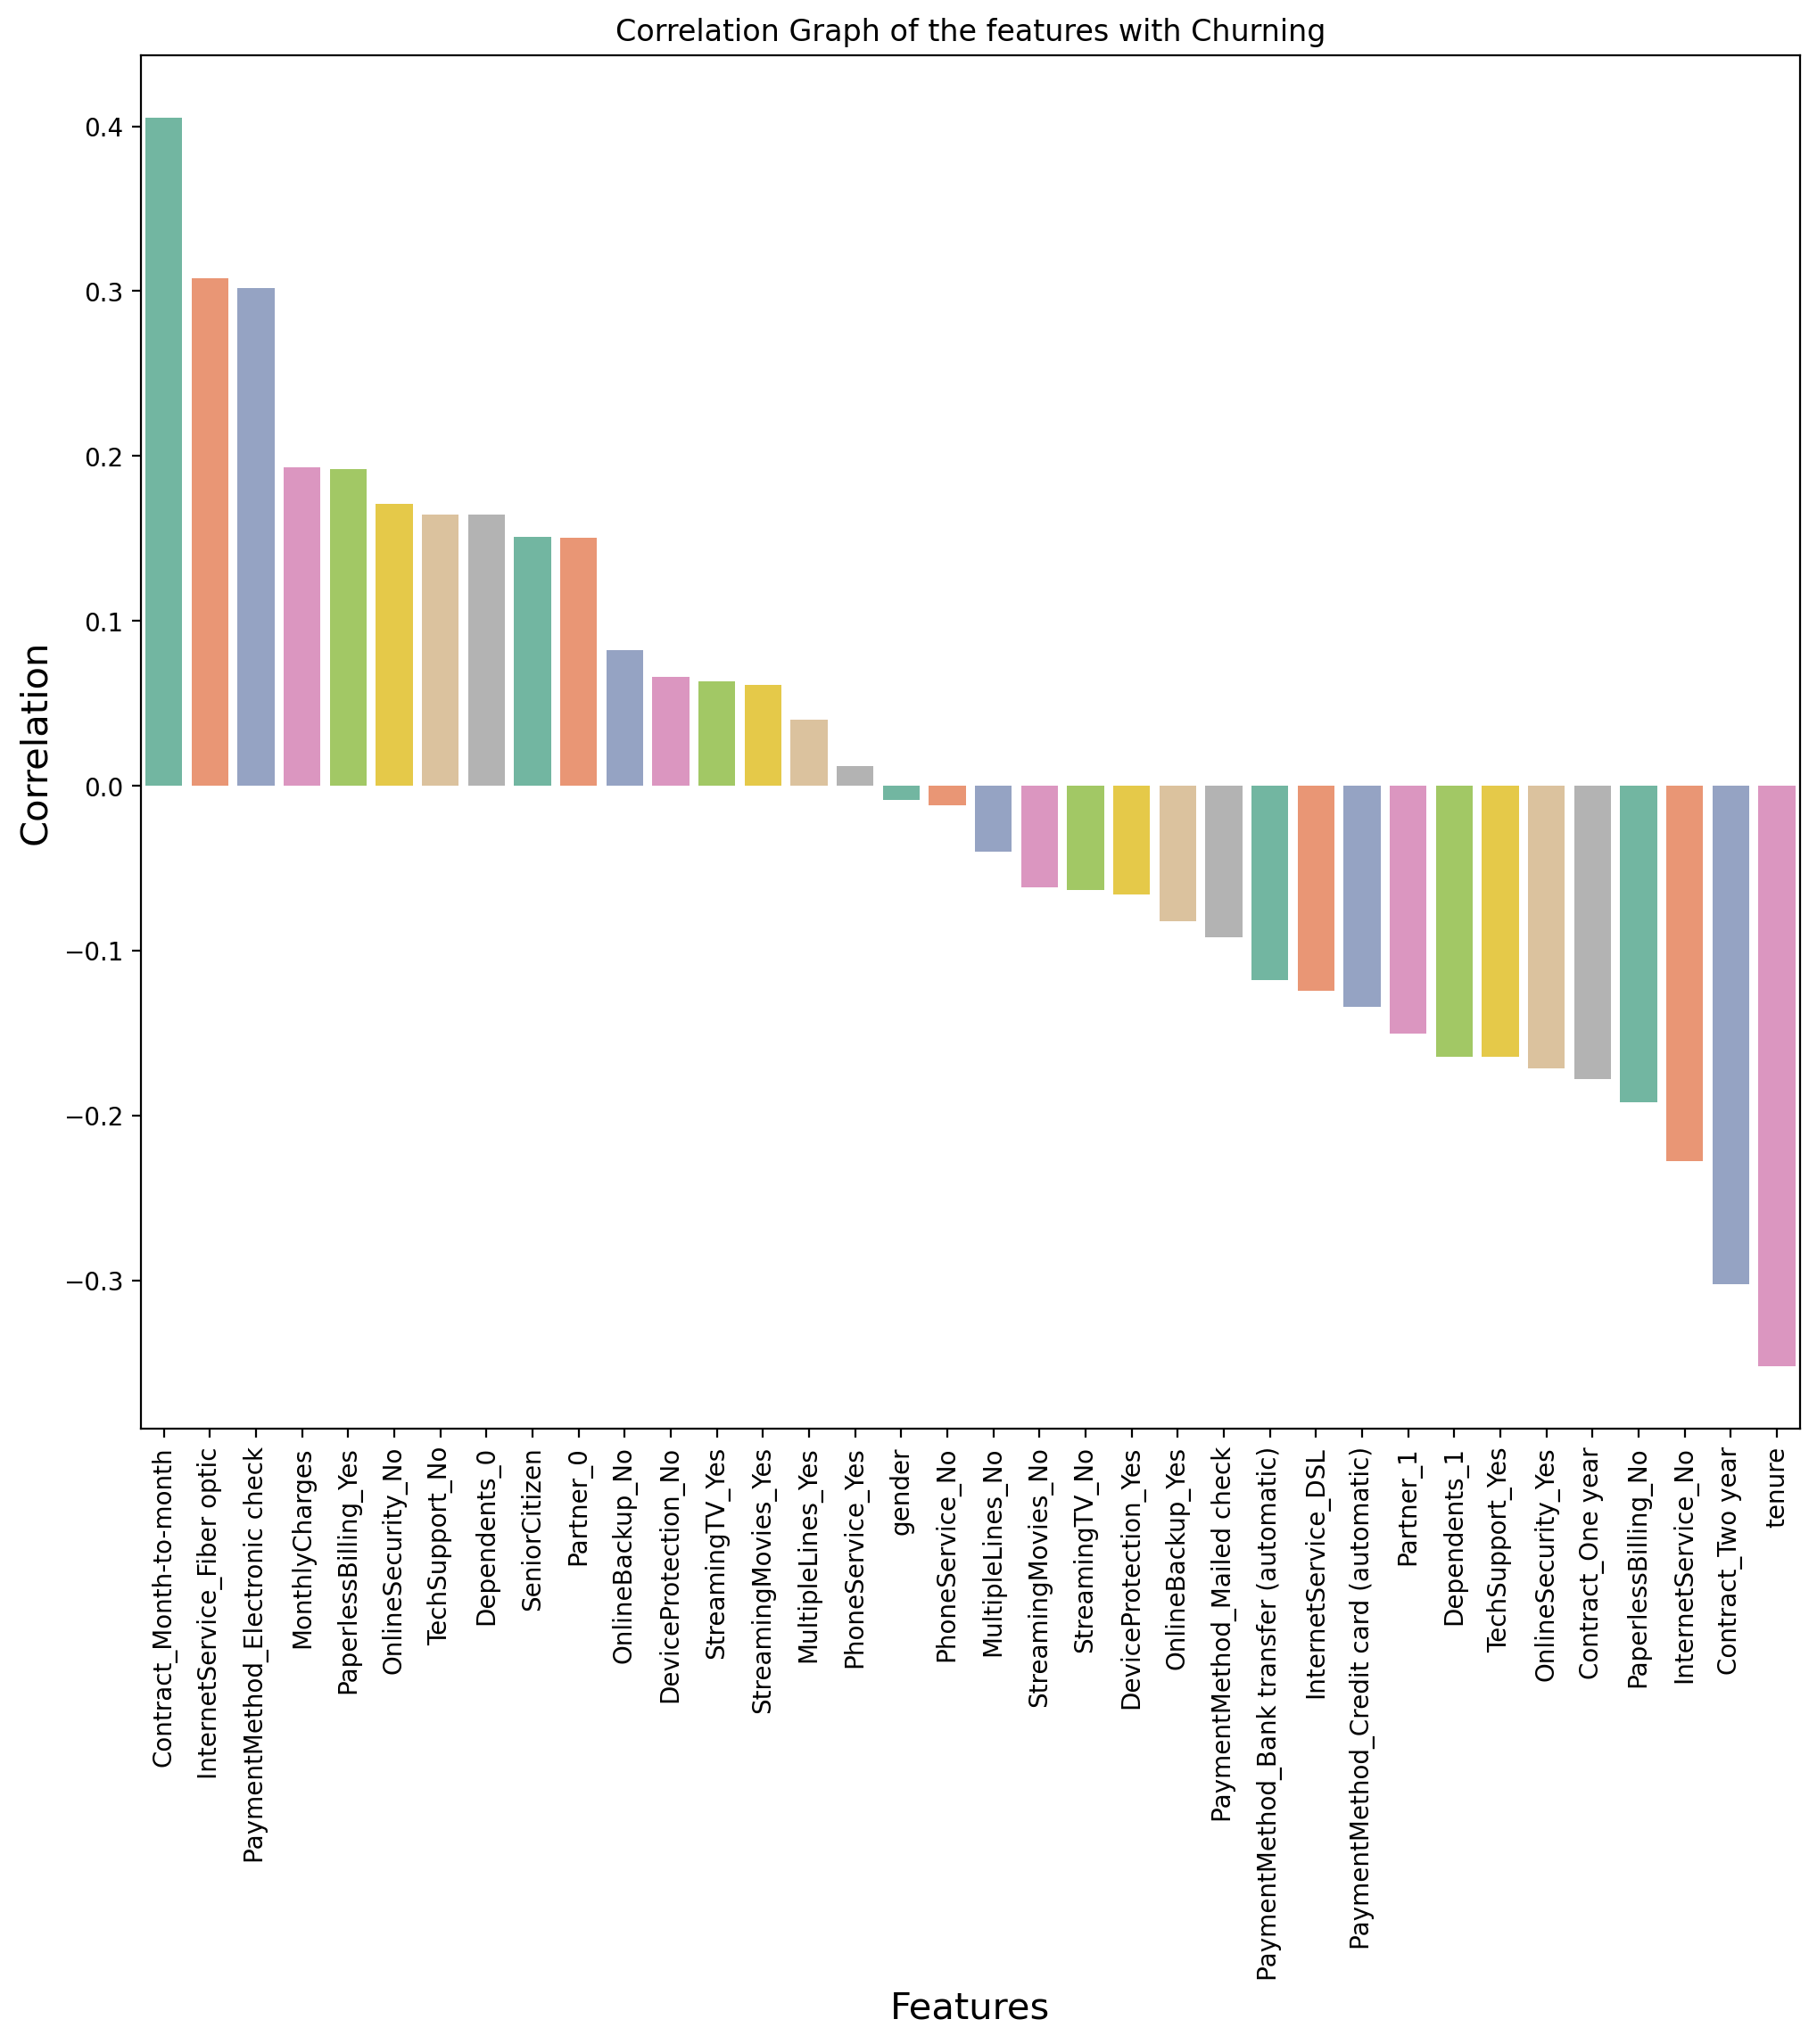

In [186]:
#We will make a barplot of the correlated features
#We will create a pallete also 
palette = 'Set2'

#Now we will create the plot
fig, ax = plt.subplots(figsize=(12,10), dpi=200)
sns.barplot(x=index, y=values, palette=palette,ax=ax)
plt.xticks(rotation=90)
plt.title('Correlation Graph of the features with Churning')
plt.ylabel('Correlation', fontsize=15)
plt.xlabel('Features', fontsize=15)
plt.show()

In [189]:
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
df_numerical=SS.fit_transform(df_numerical)
df_numerical=pd.DataFrame(df_numerical,columns=columns)


In [188]:
df_numerical

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994194
1,0.066327,-0.259629,-0.173740
2,-1.236724,-0.362660,-0.959649
3,0.514251,-0.746535,-0.195248
4,-1.236724,0.197365,-0.940457
...,...,...,...
7038,-0.340876,0.665992,-0.129180
7039,1.613701,1.277533,2.241056
7040,-0.870241,-1.168632,-0.854514
7041,-1.155283,0.320338,-0.872095


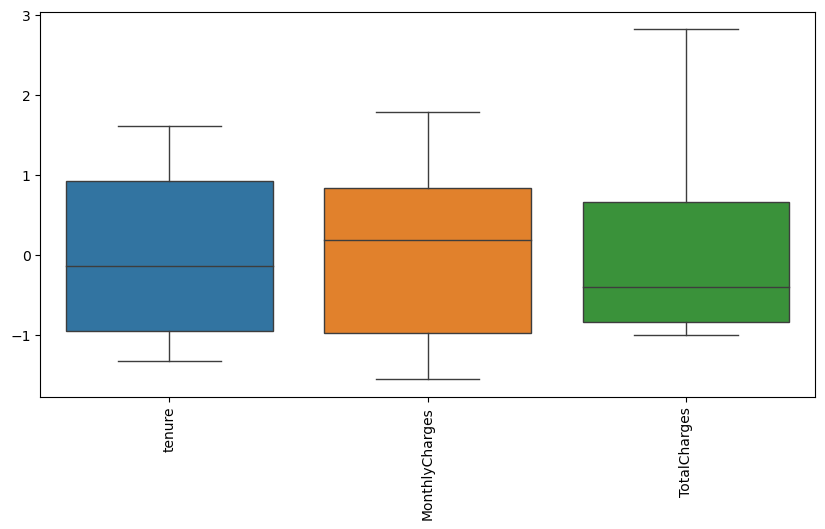

In [190]:
fig = plt.figure(figsize = (10,5))
sns.boxplot(data = df_numerical,linewidth = 1)
plt.xticks(rotation = "vertical")
plt.show() # Their is No outliers present in the data

In [191]:
df['customerID'].nunique

<bound method IndexOpsMixin.nunique of 0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object>

In [192]:
df['customerID']=df["customerID"].astype("string")

In [193]:
df.dtypes

customerID           string
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [194]:
y=df["Churn"]

In [195]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [196]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

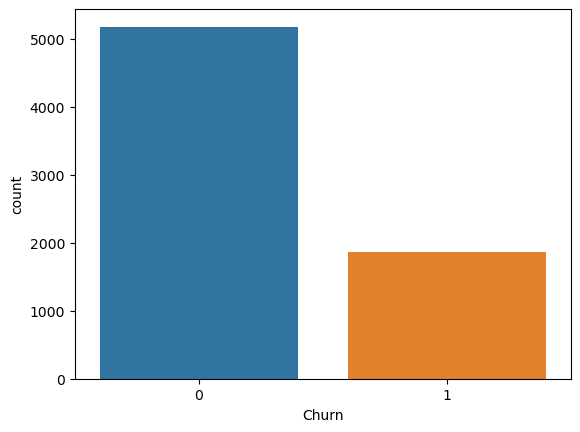

In [197]:
sns.countplot(df["Churn"])

In [198]:
df1.nunique(axis=0)

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [199]:
X_enc=df[["MultipleLines", "InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","Contract","PaymentMethod"]]

In [200]:
X_enc

,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod
0,No,DSL,No,Yes,No,No,No,No,Month-to-month,Electronic check
1,No,DSL,Yes,No,Yes,No,No,No,One year,Mailed check
2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Mailed check
3,No,DSL,Yes,No,Yes,Yes,No,No,One year,Bank transfer (automatic)
4,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Electronic check
...,...,...,...,...,...,...,...,...,...,...
7038,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Mailed check
7039,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Credit card (automatic)
7040,No,DSL,Yes,No,No,No,No,No,Month-to-month,Electronic check
7041,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Mailed check


In [201]:
X1=pd.get_dummies(X_enc)

In [202]:
X1

,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,0
1,1,0,1,0,0,0,1,1,0,0,...,0,1,0,0,1,0,0,0,0,1
2,1,0,1,0,0,0,1,0,1,1,...,0,1,0,1,0,0,0,0,0,1
3,1,0,1,0,0,0,1,1,0,0,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,1,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,0,1,1,0,0,...,1,0,1,0,1,0,0,0,0,1
7039,0,1,0,1,0,1,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
7040,1,0,1,0,0,0,1,1,0,1,...,0,1,0,1,0,0,0,0,1,0
7041,0,1,0,1,0,1,0,1,0,1,...,0,1,0,1,0,0,0,0,0,1


In [203]:
X2=df[['gender',"SeniorCitizen","Partner","Dependents"]]

In [204]:
X2

,gender,SeniorCitizen,Partner,Dependents
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,0
...,...,...,...,...
7038,1,0,1,1
7039,0,0,1,1
7040,0,0,1,1
7041,1,1,1,0


In [205]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,1,0,1,1,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,0,0,1,1,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,0,0,1,1,11,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,1,1,1,0,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [206]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
X2["gender"]=LE.fit_transform(X2[['gender']])
X2["Partner"]=LE.fit_transform(X2[['Partner']])
X2["Dependents"]=LE.fit_transform(X2[['Dependents']])

In [207]:
X2

,gender,SeniorCitizen,Partner,Dependents
0,0,0,1,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,0,0,0,0
...,...,...,...,...
7038,1,0,1,1
7039,0,0,1,1
7040,0,0,1,1
7041,1,1,1,0


In [208]:
df_categorical=pd.concat([X1,X2],axis=1)

In [209]:
df_categorical

,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,...,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents
0,1,0,1,0,0,1,0,0,1,1,...,0,0,0,0,1,0,0,0,1,0
1,1,0,1,0,0,0,1,1,0,0,...,1,0,0,0,0,1,1,0,0,0
2,1,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,1,1,0,0,0
3,1,0,1,0,0,0,1,1,0,0,...,1,0,1,0,0,0,1,0,0,0
4,1,0,0,1,0,1,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,0,1,1,0,0,...,1,0,0,0,0,1,1,0,1,1
7039,0,1,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,1
7040,1,0,1,0,0,0,1,1,0,1,...,0,0,0,0,1,0,0,0,1,1
7041,0,1,0,1,0,1,0,1,0,1,...,0,0,0,0,0,1,1,1,1,0


In [210]:
x=pd.concat([df_categorical,df_numerical],axis=1)
x

,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,0,1,1,...,0,1,0,0,0,1,0,-1.277445,-1.160323,-0.994194
1,1,0,1,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0.066327,-0.259629,-0.173740
2,1,0,1,0,0,0,1,0,1,1,...,0,0,1,1,0,0,0,-1.236724,-0.362660,-0.959649
3,1,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0.514251,-0.746535,-0.195248
4,1,0,0,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,-1.236724,0.197365,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,0,1,1,0,0,...,0,0,1,1,0,1,1,-0.340876,0.665992,-0.129180
7039,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,1,1.613701,1.277533,2.241056
7040,1,0,1,0,0,0,1,1,0,1,...,0,1,0,0,0,1,1,-0.870241,-1.168632,-0.854514
7041,0,1,0,1,0,1,0,1,0,1,...,0,0,1,1,1,1,0,-1.155283,0.320338,-0.872095


In [211]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [212]:
x

,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges
0,1,0,1,0,0,1,0,0,1,1,...,0,1,0,0,0,1,0,-1.277445,-1.160323,-0.994194
1,1,0,1,0,0,0,1,1,0,0,...,0,0,1,1,0,0,0,0.066327,-0.259629,-0.173740
2,1,0,1,0,0,0,1,0,1,1,...,0,0,1,1,0,0,0,-1.236724,-0.362660,-0.959649
3,1,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0.514251,-0.746535,-0.195248
4,1,0,0,1,0,1,0,1,0,1,...,0,1,0,0,0,0,0,-1.236724,0.197365,-0.940457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,0,0,0,1,1,0,0,...,0,0,1,1,0,1,1,-0.340876,0.665992,-0.129180
7039,0,1,0,1,0,1,0,0,1,0,...,1,0,0,0,0,1,1,1.613701,1.277533,2.241056
7040,1,0,1,0,0,0,1,1,0,1,...,0,1,0,0,0,1,1,-0.870241,-1.168632,-0.854514
7041,0,1,0,1,0,1,0,1,0,1,...,0,0,1,1,1,1,0,-1.155283,0.320338,-0.872095


In [213]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

In [214]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20 , random_state = 1)

In [215]:
y_train

1814    0
5946    1
3881    0
2389    0
3676    0
       ..
905     1
5192    0
3980    1
235     1
5157    0
Name: Churn, Length: 5634, dtype: int64

In [216]:
y_train=pd.DataFrame(y_train)
y_train

,Churn
1814,0
5946,1
3881,0
2389,0
3676,0
...,...
905,1
5192,0
3980,1
235,1


In [217]:
x_train

,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,...,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender,SeniorCitizen,Partner,Dependents,tenure,MonthlyCharges,TotalCharges
1814,1,0,0,0,1,1,0,1,0,1,...,0,0,1,1,0,1,1,-0.829521,-1.497668,-0.893383
5946,1,0,1,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0.392090,0.303720,0.387032
3881,0,1,1,0,0,0,1,0,1,1,...,0,0,0,1,0,1,0,1.572981,0.012906,1.058166
2389,0,1,1,0,0,0,1,1,0,0,...,0,1,0,1,0,1,1,1.572981,0.687595,1.772493
3676,1,0,1,0,0,0,1,0,1,1,...,0,1,0,1,0,0,0,-0.096554,0.187394,-0.105245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,0,1,0,1,0,1,0,1,0,0,...,0,1,0,1,1,0,0,-0.951682,1.187796,-0.602089
5192,1,0,0,0,1,1,0,1,0,1,...,0,0,1,1,0,0,1,1.125057,-1.489359,-0.482395
3980,0,1,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,-0.177995,1.360623,0.307155
235,0,1,1,0,0,1,0,0,1,1,...,0,0,1,1,0,0,0,-1.236724,-0.344381,-0.957024


In [218]:
x_train.isna().sum()

MultipleLines_No                           0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_Yes                       0
TechSupport_No                             0
TechSupport_Yes                            0
StreamingTV_No                             0
StreamingTV_Yes                            0
StreamingMovies_No                         0
StreamingMovies_Yes                        0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMet

In [219]:
x_train['TotalCharges'].isna().sum()

8

In [220]:
print(df_numerical[df_numerical['TotalCharges']==np.NaN])

Empty DataFrame
Columns: [tenure, MonthlyCharges, TotalCharges]
Index: []


In [221]:
x_train['TotalCharges'].mean()

-0.0011638793661927994

In [222]:
x_train['TotalCharges'].fillna(value=x_train['TotalCharges'].mean(),inplace=True)

In [223]:
x_train['TotalCharges'].isna().sum()

0

In [224]:
from sklearn.feature_selection import SelectKBest # chi2 test for input features selection with respect to output variable by k score values greater the 5.
from sklearn.feature_selection import chi2

In [225]:
select_kbest_rank_features= SelectKBest(score_func= chi2, k=5)
kbest_features= select_kbest_rank_features.fit(abs(x_train),y_train)

churn_2_dumm_kscore= pd.DataFrame(kbest_features.scores_,columns=['Score'])
churn_2_dumm_columns= pd.DataFrame(x_train.columns)

kbest_features_rank= pd.concat([churn_2_dumm_kscore, churn_2_dumm_columns], axis=1)
kbest_features_rank.columns= ['k_score', 'features']

kbest_features_rank
print(kbest_features_rank.sort_values(by='k_score', ascending= False))

       k_score                                 features
17  411.969108                  Contract_Month-to-month
19  398.361755                        Contract_Two year
22  332.015432           PaymentMethod_Electronic check
3   302.987484              InternetService_Fiber optic
4   228.770934                       InternetService_No
18  134.307667                        Contract_One year
6   111.472278                       OnlineSecurity_Yes
12  100.271972                          TechSupport_Yes
25   95.168730                            SeniorCitizen
27   91.961117                               Dependents
21   68.898045    PaymentMethod_Credit card (automatic)
20   64.094831  PaymentMethod_Bank transfer (automatic)
2    59.122944                      InternetService_DSL
26   57.807655                                  Partner
5    44.677601                        OnlineSecurity_No
11   40.890519                           TechSupport_No
23   38.344794               PaymentMethod_Maile

In [226]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info


array([0.        , 0.00832939, 0.00557328, 0.05830649, 0.02459408,
       0.00979872, 0.01407727, 0.0067232 , 0.00785736, 0.00583961,
       0.00342405, 0.00792402, 0.02108931, 0.        , 0.00750922,
       0.00802625, 0.00017428, 0.09473021, 0.00551911, 0.05635127,
       0.0136977 , 0.00079228, 0.04002754, 0.00230274, 0.        ,
       0.01713258, 0.01558254, 0.01358723, 0.07765748, 0.04523744,
       0.04692555])

In [227]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)


Contract_Month-to-month                    0.094730
tenure                                     0.077657
InternetService_Fiber optic                0.058306
Contract_Two year                          0.056351
TotalCharges                               0.046926
MonthlyCharges                             0.045237
PaymentMethod_Electronic check             0.040028
InternetService_No                         0.024594
TechSupport_Yes                            0.021089
SeniorCitizen                              0.017133
Partner                                    0.015583
OnlineSecurity_Yes                         0.014077
PaymentMethod_Bank transfer (automatic)    0.013698
Dependents                                 0.013587
OnlineSecurity_No                          0.009799
MultipleLines_Yes                          0.008329
StreamingMovies_No                         0.008026
TechSupport_No                             0.007924
OnlineBackup_Yes                           0.007857
StreamingTV_

In [228]:
#we Will select the  top 10 important features
from sklearn.feature_selection import SelectKBest
sel_five_cols = SelectKBest(mutual_info_classif, k=10)
sel_five_cols.fit(x_train, y_train)
x_train.columns[sel_five_cols.get_support()]


Index(['InternetService_Fiber optic', 'InternetService_No',
       'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'Dependents', 'tenure',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [229]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import LinearSVC
random_forest_clf = RandomForestClassifier(n_estimators=5, random_state=42)
svm_clf = LinearSVC(random_state=42)
LR=LogisticRegression()
KNN=KNeighborsClassifier(n_neighbors=3)
DTC=DecisionTreeClassifier(max_depth=100,max_features=20,random_state=42)
estimators = [svm_clf,LR, KNN,DTC,random_forest_clf]
for estimator in estimators:
    estimator.fit(x_train, y_train)

In [230]:
esttrain= [estimator.score(x_train, y_train) for estimator in estimators]
esttrain

[0.8004969826056088,
 0.8013844515441959,
 0.8647497337593184,
 0.9971600993965212,
 0.9687610933617323]

In [ ]:
estimators

In [ ]:
Train_accuracy=pd.DataFrame(esttrain,estimators,columns=['Accuracy'])
Train_accuracy.sort_values(by="Accuracy",ascending=True)

In [ ]:
x_test.isna().sum()

In [ ]:
x_test["TotalCharges"].fillna(value=x_test["TotalCharges"].mean(), inplace=True)

In [ ]:
x_test.isna().sum()

In [ ]:
y_test

In [ ]:
esttest= [estimator.score(x_test, y_test) for estimator in estimators]
esttest

In [ ]:
Test_accuracy=pd.DataFrame(esttest,estimators,columns=['Accuracy'])
Test_accuracy.sort_values(by="Accuracy",ascending=True)

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
oversample=RandomOverSampler(random_state=42)

In [ ]:
x_over, y_over = oversample.fit_resample(x, y)

In [ ]:
x_over

In [ ]:
x_over.isna().sum()

In [ ]:
y_over.value_counts()

In [ ]:
sns.countplot(y_over) # Here we balance the target variable by RandomOversampler

In [ ]:
x_over.fillna(x_over.mean(),inplace=True)

In [ ]:
x_over.isna().sum()

In [ ]:
y_over1=y_over.fillna(x_over.mean(), inplace=True)

In [176]:
from sklearn.feature_selection import SelectKBest # chi2 test for input features selection with respect to output variable by k score values greater the 5.
from sklearn.feature_selection import chi2

In [177]:
select_kbest_rank_features= SelectKBest(score_func= chi2, k=5)
kbest_features= select_kbest_rank_features.fit(abs(x_over),y_over)

churn_2_dumm_kscore= pd.DataFrame(kbest_features.scores_,columns=['Score'])
churn_2_dumm_columns= pd.DataFrame(x_over.columns)

kbest_features_rank= pd.concat([churn_2_dumm_kscore, churn_2_dumm_columns], axis=1)
kbest_features_rank.columns= ['k_score', 'features']

kbest_features_rank
print(kbest_features_rank.sort_values(by='k_score', ascending= False))

NameError: name 'x_over' is not defined

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x_over1_scale = pd.DataFrame(sc.fit_transform(x_over),columns = x_over.columns)

In [ ]:
x_over1_scale.head()

In [ ]:
from sklearn.model_selection import train_test_split # Here splitting data into train test split for training and testing model

In [ ]:
x_over1_scale_train, x_over1_scale_test, y_over1_train, y_over1_test = train_test_split(x_over1_scale, y_over, test_size=0.20, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

Model1=lr.fit(x_over1_scale_train,y_over1_train)

In [ ]:
y_pred_lr = Model1.predict(x_over1_scale_test)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [ ]:
print(confusion_matrix(y_pred_lr,y_over1_test)) # Accuracy of Logistic regression is 77.97%
print('accuracy % =',accuracy_score(y_over1_test,y_pred_lr))
print(classification_report(y_over1_test,y_pred_lr))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

Model2 = rf.fit(x_over1_scale_train,y_over1_train)


In [ ]:
y_pred_rf = Model2.predict(x_over1_scale_test)

In [ ]:
print(confusion_matrix(y_pred_rf,y_over1_test)) # Accuracy of Random forest is 89.22%
print('accuracy % =',accuracy_score(y_over1_test,y_pred_rf))
print(classification_report(y_over1_test,y_pred_rf))

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.svm import LinearSVC
random_forest_clf = RandomForestClassifier(n_estimators=5, random_state=42)
svm_clf = LinearSVC(random_state=42)
LR=LogisticRegression()
KNN=KNeighborsClassifier(n_neighbors=3)
DTC=DecisionTreeClassifier(max_depth=100,max_features=20,random_state=42)
estimators = [svm_clf,LR, KNN,DTC,random_forest_clf]
for estimator in estimators:
    estimator.fit(x_over1_scale_train, y_over1_train)

In [ ]:
esttrain= [estimator.score(x_over1_scale_train, y_over1_train) for estimator in estimators]
esttrain

In [ ]:
Train_accuracy=pd.DataFrame(esttrain,estimators,columns=['Train Accuracy'])
Train_accuracy.sort_values(by="Train Accuracy",ascending=True)

In [ ]:
esttest= [estimator.score(x_over1_scale_test, y_over1_test) for estimator in estimators]
esttest

In [ ]:
Test_accuracy=pd.DataFrame(esttest,estimators,columns=['Test accuracy'])
#Test_accuracy.sort_values(by="Test Accuracy",ascending=True)
Test_accuracy